In [1]:
import sys
sys.path.append('../')
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from smodels.theory.element import Element
from smodels.theory.auxiliaryFunctions import getTreeRoot, fromTreeToList

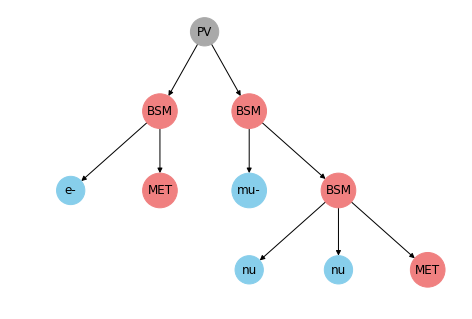

[[e-], [mu-, [nu, nu]]]

In [2]:
el = Element(info="[[['e-']],[['mu-'],['nu','nu']]]")
el.drawTree()
fromTreeToList(el.tree)

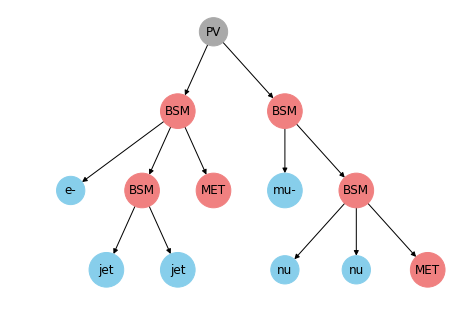

In [3]:
el = Element(info="[[['e-',[['jet','jet']]]],[['mu-'],['nu','nu']]]")
el.drawTree(outputFile='SMSgeneral1.png')

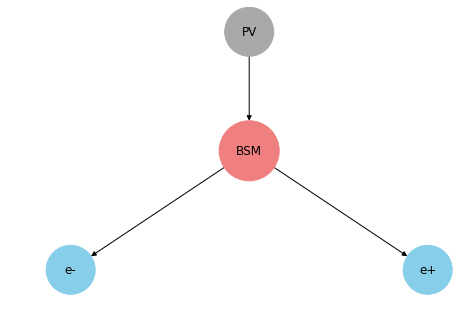

In [5]:
el = Element(info="[[['e-']]]",finalState=['e+'])
el.drawTree(outputFile='SMSgeneral2.png',nodeScale=12)

In [15]:
# el.tree.remove_node(1)
fromTreeToList(el.tree)

SModelSTheoryError: 'Malformed Tree, 4 root(s) have been found.'

In [ ]:
T = el.tree
print(T.graph['topologyName'])

In [ ]:
def treeToList(T,node=None):
    """
    Convert a Tree to a nested list with the Z2 even
    final states. The Z2 odd final states (e.g. 'MET', 'HSCP') are
    not included.
    
    :param T: DiGraph object
    :param node: Name of node. If None it will start with the primary node
    
    :return: Nested list with Z2-even particle objects (e.g. [[[e-,mu],[L]],[[jet]]])
    """

    if not isinstance(T,nx.DiGraph):
        raise SModelSError("Input must be a DiGraph object.")
    
    #Get the primary vertex:
    if node is None:
        node = getTreeRoot(T)

    children = list(T[node])
    if not children:
        return str(T.nodes[node]['particle'])
    else:
        finalStates = [] #Store (stable) final states
        branches = [] #Store cascade decays
        for n in children:
            ptc = treeToList(T,n)
            if isinstance(ptc,list):
                branches.append(ptc)
            else:
                finalStates.append(ptc)
        vList = []
        if finalStates: #If there are no stable particle in its de
            vList.append(finalStates)
        if branches:
            if len(branches) != 1:
                vList += branches
            else:
                vList += branches[0]
        return vList


In [ ]:
el = Element(info="[[ ['e-', [['ta-','ta+']]] ],[['mu-'],['nu','nu']]]")
el.drawTree()
treeToList(el.tree)

In [ ]:
[['mu']] + [['nu','nu','MET']]

In [ ]:
elementStr = "[[[['ta+','ta-'],'e+']],[['mu-']]]"
g = stringToGraph(elementStr)
el = Element(info=g)
el.drawTree()

In [ ]:
eval("[[*],[['*'],[ '*']]]".replace('[*]',"'InclusiveBranch'"))